In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
import shap
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('E:\\CODE\\python\\Machine_learning\\Do_an_cuoiky\\datasets\\Heart_Attack\\Heart Attack.csv')
# df = pd.read_csv('E:\\CODE\\python\\Machine_learning\\decision_tree\\heart_disease\\heart\\heart.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [5]:
df.shape

(1319, 9)

- chuyển đổi các thành phần trong lớp class thành số

In [6]:
from sklearn.preprocessing import LabelEncoder
ecd = LabelEncoder()
df['class'] = ecd.fit_transform(df['class'])
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


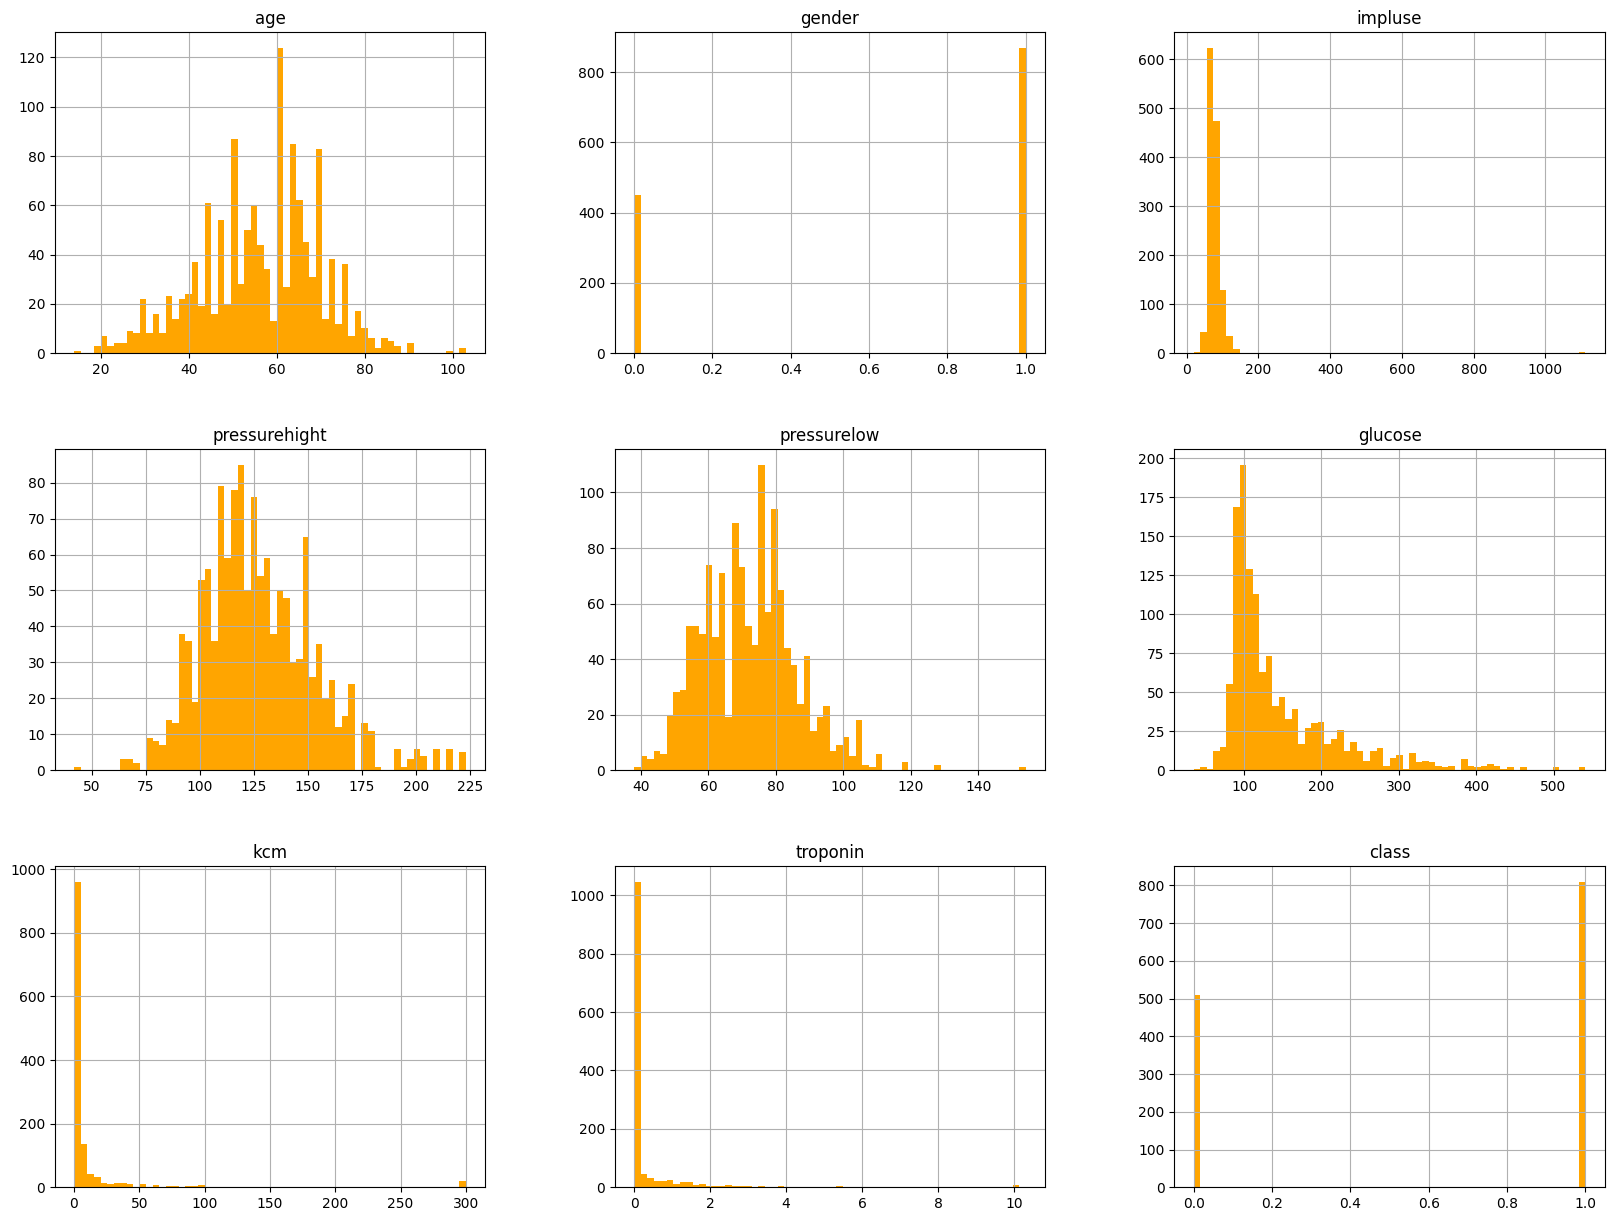

In [7]:
df.hist(bins=60, figsize=(20,15), color='orange')

plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



,class,count
0,1,810
1,0,509


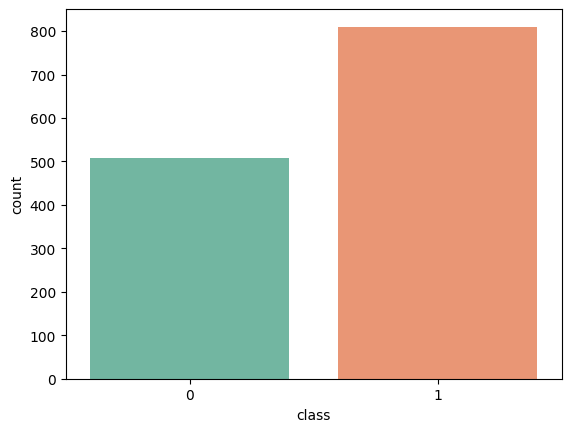

In [8]:
sns.countplot(data=df,x='class',palette='Set2')
df['class'].value_counts().reset_index(name='count')

In [9]:
feature_names = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
X = df.drop(columns= ['class'], axis=1).values
y = df['class'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Sử dụng RandomOverSampler để cân bằng dữ liệu ở lớp class

In [11]:
from imblearn.over_sampling import RandomOverSampler
X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)

- Standardization

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X.shape

(1319, 8)

- PCA

In [14]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = None)
# X = pca.fit_transform(X)
# X.shape

In [15]:
sum(y_train == 0)

647

In [16]:
sum(y_train == 1)


647

## SVM

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [17]:
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)
print(best_model)

{'C': 100, 'kernel': 'linear'}
SVC(C=100, kernel='linear')


In [18]:
from sklearn import svm
svm = svm.SVC(kernel='linear', C = 100)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [19]:
# Kết quả
print("- Kết quả trên tập test: ")
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred))
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("recall_score: ", metrics.recall_score(y_test, y_pred))
print("precision_score: ", metrics.precision_score(y_test, y_pred))

- Kết quả trên tập test: 
confusion_matrix: 
 [[ 96   5]
 [ 19 144]]
accuracy_score:  0.9090909090909091
f1_score:  0.923076923076923
recall_score:  0.8834355828220859
precision_score:  0.9664429530201343


In [20]:
y_train_pred_svm = svm.predict(X_train)
print("- accuracy_score_on_training_set: \n", metrics.accuracy_score(y_train, y_train_pred_svm))

- accuracy_score_on_training_set: 
 0.9265842349304482


## MLP

In [21]:
# Khai báo thư viện
from sklearn.neural_network import MLPClassifier

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [22]:
# Thiết lập lưới tìm kiếm
param_grid_mlp = {'hidden_layer_sizes': [(10,10), (10, )],
                  'alpha': [0.001, 0.01, 0.1]}

# Tạo mô hình MLP
mlp = MLPClassifier(max_iter=500)

# Tìm kiếm trên lưới
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

# In kết quả
print("Best parameters for MLP:", grid_search_mlp.best_params_)

# Đánh giá mô hình trên tập kiểm thử
y_pred_mlp = grid_search_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy on test set:", accuracy_mlp)

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Best parameters for MLP: {'alpha': 0.01, 'hidden_layer_sizes': (10, 10)}
Accuracy on test set: 0.8560606060606061


Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


In [23]:
#Train 
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), alpha=0.001, max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


In [24]:
#Kết quả
from sklearn import metrics
print("- Kết quả trên tập test: ")
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred_mlp))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred_mlp))
print("f1_score: ", metrics.f1_score(y_test, y_pred_mlp))
print("recall_score: ", metrics.recall_score(y_test, y_pred_mlp))
print("precision_score: ", metrics.precision_score(y_test, y_pred_mlp))


- Kết quả trên tập test: 
confusion_matrix: 
 [[ 82  19]
 [ 23 140]]
accuracy_score:  0.8409090909090909
f1_score:  0.8695652173913043
recall_score:  0.8588957055214724
precision_score:  0.8805031446540881


In [25]:
y_train_pred_mlp = mlp.predict(X_train)
print("- accuracy_score_on_training_set: \n", metrics.accuracy_score(y_train, y_train_pred_mlp))

- accuracy_score_on_training_set: 
 0.9204018547140649


## Logistic_regression

In [26]:
# Khai báo thư viện
from sklearn.linear_model import LogisticRegression

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [27]:
# Thiết lập lưới tìm kiếm
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Tạo mô hình Logistic Regression
logistic_regression = LogisticRegression()

# Tìm kiếm trên lưới
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# In kết quả
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

# Đánh giá mô hình trên tập kiểm thử
y_pred_lr = grid_search_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy on test set:", accuracy_lr)

Best parameters for Logistic Regression: {'C': 100}
Accuracy on test set: 0.8863636363636364


In [28]:
# Train
lgr = LogisticRegression(C = 100).fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)

In [48]:
# Kết quả
print("- Kết quả trên tập test: ")
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred_lgr))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred_lgr))
print("f1_score: ", metrics.f1_score(y_test, y_pred_lgr))
print("recall_score: ", metrics.recall_score(y_test, y_pred_lgr))
print("precision_score: ", metrics.precision_score(y_test, y_pred_lgr))

- Kết quả trên tập test: 
confusion_matrix: 
 [[ 94   7]
 [ 23 140]]
accuracy_score:  0.8863636363636364
f1_score:  0.9032258064516129
recall_score:  0.8588957055214724
precision_score:  0.9523809523809523


In [30]:
y_train_pred_lgr = lgr.predict(X_train)
print("- accuracy_score_on_training_set: \n", metrics.accuracy_score(y_train, y_train_pred_lgr))

- accuracy_score_on_training_set: 
 0.9088098918083463


## Decision Tree

In [31]:
# Khai báo thư viện
from sklearn.tree import DecisionTreeClassifier

- Sử dụng Hyperparameter tuning để chọn ra tham số và model tốt nhất

In [32]:
# Thiết lập lưới tìm kiếm
param_grid_dt = {'max_depth': [2,5,6,10], 
                 'min_samples_split' : [0.1, 0.2, 0.3, 0.4], 
                 'min_samples_leaf' : [0.1, 0.2, 0.3, 0.4], 
                 'criterion': ['gini','entropy']}

# Tạo mô hình Decision Tree
dt = DecisionTreeClassifier()

# Tìm kiếm trên lưới
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# In kết quả
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

# Đánh giá mô hình trên tập kiểm thử
y_pred_dt_test = grid_search_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt_test)
print("Accuracy on test set:", accuracy_dt)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
Accuracy on test set: 0.9772727272727273


In [33]:
# Train
dt = DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2, criterion='gini', min_samples_leaf=0.1, min_samples_split=0.1, random_state=2023).fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [34]:
# Kết quả
print("- Kết quả trên tập test:")
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred_dt))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred_dt))
print("f1_score: ", metrics.f1_score(y_test, y_pred_dt))
print("recall_score: ", metrics.recall_score(y_test, y_pred_dt))
print("precision_score: ", metrics.precision_score(y_test, y_pred_dt))


- Kết quả trên tập test:
confusion_matrix: 
 [[ 98   3]
 [  3 160]]
accuracy_score:  0.9772727272727273
f1_score:  0.98159509202454
recall_score:  0.9815950920245399
precision_score:  0.9815950920245399


In [35]:
y_train_pred_dt = dt.predict(X_train)
print("- accuracy_score_on_training_set: \n", metrics.accuracy_score(y_train, y_train_pred_dt))

- accuracy_score_on_training_set: 
 0.9845440494590417


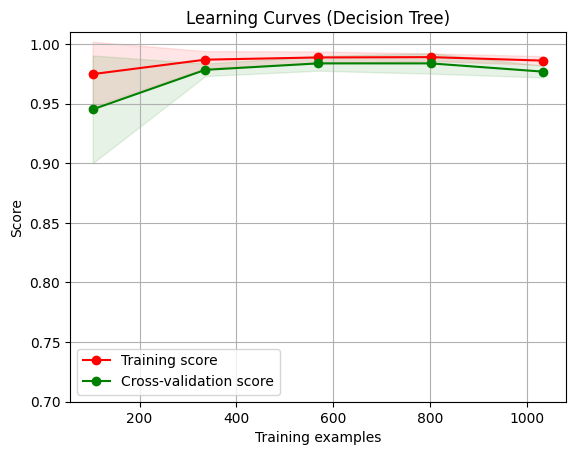

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, 
        scoring=make_scorer(metrics.accuracy_score))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Sử dụng ShuffleSplit để tạo các tập kiểm thử ngẫu nhiên
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Tạo mô hình Decision Tree với các tham số tốt nhất từ grid search
best_dt_model = DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2, criterion='gini', min_samples_leaf=0.1, min_samples_split=0.1)

# Vẽ learning curve
title = "Learning Curves (Decision Tree)"
plot_learning_curve(best_dt_model, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


## Cross-validation

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
log_reg_cv = LogisticRegression(C = 100)
dt_cv = DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2, criterion='gini', min_samples_leaf=0.1, min_samples_split=0.1, random_state=2023)
lr_score = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)
dt_score = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

In [39]:
lr_score.mean(), lr_score.std()

(0.8127405231017398, 0.03714113647264435)

In [40]:
dt_score.mean(), dt_score.std()

(0.9863607558474479, 0.01060338706870818)

In [41]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Tạo các mô hình
log_reg_cv = LogisticRegression(C=100)
dt_cv = DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2, criterion='gini', 
                                min_samples_leaf=0.1, min_samples_split=0.1, random_state=2023)
svm_cv = SVC(C=1.0, kernel='linear')
mlp_cv = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=2023)

# Tính toán cross-validation scores
lr_score = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)
dt_score = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)
svm_score = cross_val_score(svm_cv, X, y, scoring='accuracy', cv=5)
mlp_score = cross_val_score(mlp_cv, X, y, scoring='accuracy', cv=5)

# Tạo DataFrame
data = {
    'Logistic Regression': lr_score,
    'Decision Tree': dt_score,
    'SVM': svm_score,
    'MLP': mlp_score
}

df_scores = pd.DataFrame(data)

# In bảng so sánh
print(df_scores)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


   Logistic Regression  Decision Tree       SVM       MLP
0             0.875000       0.965909  0.803030  0.761364
1             0.772727       0.988636  0.806818  0.742424
2             0.776515       0.992424  0.784091  0.750000
3             0.821970       0.988636  0.806818  0.731061
4             0.817490       0.996198  0.825095  0.813688


# Dùng shap train model tốt nhất

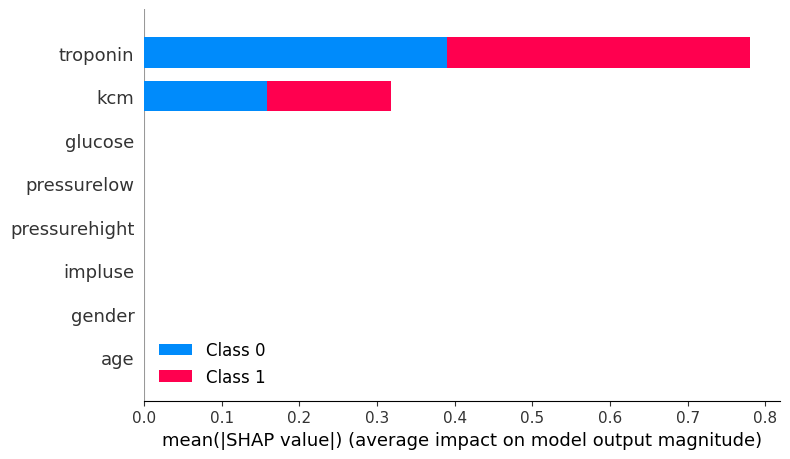

In [42]:
# Use the KernelExplainer for SVM
explainer = shap.Explainer(dt)
shap_values = explainer.shap_values(X_train)

# Plot the summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=feature_names)

In [43]:
# Loại bỏ những feature không quan trọng
X_dt = df.drop(columns= ['class', 'impluse', 'age', 'pressurelow', 'glucose']).values

In [44]:

# Chia dữ liệu để train, test
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y, test_size=0.2, random_state=42)

In [45]:
# Train
dt_shap = DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2, criterion='gini', min_samples_leaf=0.1, min_samples_split=0.1).fit(X_dt_train, y_dt_train)
y_pred_dt_shap = dt_shap.predict(X_dt_test)

In [46]:
# Kết quả
print("- Kết quả trên tập test:")
print("confusion_matrix: \n", metrics.confusion_matrix(y_dt_test, y_pred_dt_shap))
print("accuracy_score: ", metrics.accuracy_score(y_dt_test, y_pred_dt_shap))
print("f1_score: ", metrics.f1_score(y_dt_test, y_pred_dt_shap))
print("recall_score: ", metrics.recall_score(y_dt_test, y_pred_dt_shap))
print("precision_score: ", metrics.precision_score(y_dt_test, y_pred_dt_shap))


- Kết quả trên tập test:
confusion_matrix: 
 [[ 99   2]
 [  3 160]]
accuracy_score:  0.9810606060606061
f1_score:  0.9846153846153846
recall_score:  0.9815950920245399
precision_score:  0.9876543209876543


In [47]:
y_train_pred_dt_shap = dt_shap.predict(X_dt_train)
print("- accuracy_score_on_training_set: \n", metrics.accuracy_score(y_dt_train, y_train_pred_dt_shap))


- accuracy_score_on_training_set: 
 0.9886255924170616
